In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import datetime
def epoch_seconds(rx_ts):
    even_seconds = rx_ts['sec']
    nanoseconds = rx_ts['nanosec']
    # print(even_seconds, nanoseconds)
    return even_seconds + nanoseconds/1000000000.0
def rx_epoch_seconds(json_element):
    rx_ts = json_element['rx_ts']
    return epoch_seconds(rx_ts)
def rx_timestamp(json_element):
    return datetime.datetime.utcfromtimestamp(rx_epoch_seconds(json_element))
def points_tuple(topic, json_data):
    data_values = list(map(lambda x: float(x['data']), filter((lambda x: x['topic'] == topic),json_data)))
    data_seconds= list(map(lambda x: rx_epoch_seconds(x), filter((lambda x: x['topic'] == topic),json_data)))
    return (data_seconds, data_values)    
def write_ssv(outpath, numerical_messages):
    with open(outpath, 'w') as file_handler:
        for nmsg in numerical_messages:
            seconds = rx_epoch_seconds(nmsg)
            topic = nmsg['topic']
            svalue = nmsg['data']
            try:
                value = float(nmsg['data'])
                file_handler.write("{} {} {}\n".format(seconds, topic, value))
            except:
                pass


In [2]:
filepath = "../samples/Trident-Jul-18-185925.json"

In [3]:
with open(filepath) as json_file:
    text = json_file.read()
    json_data = json.loads(text)

In [4]:
numerical_messages = [msg for msg in json_data if msg['topic'] not in ['FlightCameraH264Message', 'FlightVideoScreenshotMessage']]

In [5]:
len(numerical_messages)

73284

In [6]:
outfilepath = "../samples/Trident-Jul-18-185925.ssv"
write_ssv(outfilepath, numerical_messages)

In [7]:
depth = points_tuple('depth', json_data)
water_temperature = points_tuple('temp.water.temperature.temperature_', json_data)
minutes_to_empty = points_tuple('fuelgauge.health.average_time_to_empty_mins', json_data)
pitch = points_tuple('attitude.calc.pitch', json_data)
roll = points_tuple('attitude.calc.roll', json_data)
yaw = points_tuple('attitude.calc.yaw', json_data)

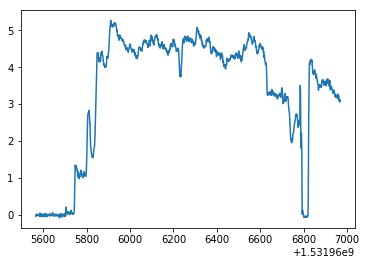

In [8]:
plt.plot(depth[0], depth[1])
plt.show()

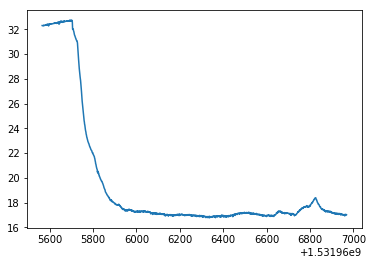

In [9]:
plt.plot(water_temperature[0], water_temperature[1])
plt.show()

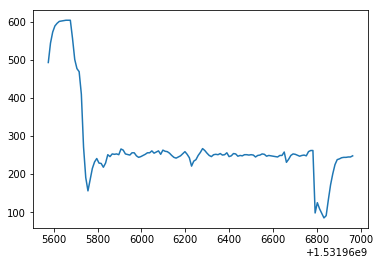

In [10]:
plt.plot(minutes_to_empty[0], minutes_to_empty[1])
plt.show()

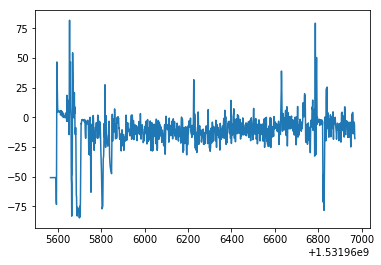

In [11]:
plt.plot(pitch[0], pitch[1])
plt.show()

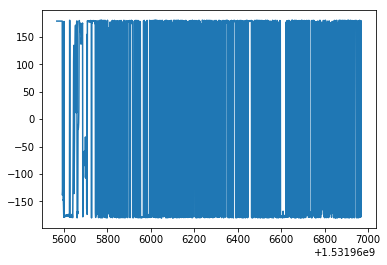

In [14]:
plt.plot(roll[0], roll[1])
plt.show()

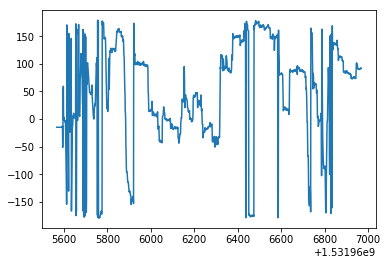

In [15]:
plt.plot(yaw[0], yaw[1])
plt.show()